In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time

from models.manifold_traversal import ManifoldTraversal
from models.traversal_network import TraversalNetwork, GravitationalWaveVisualizer

In [2]:
data_dir = './data'
train_waves_filename = 'datawaves_20000_spinsFalse_nonuniform.npy'
X_natural_train = np.load(os.path.join(data_dir, train_waves_filename)).T

D = X_natural_train.shape[0]
N_train = X_natural_train.shape[1]

X_train_subset = X_natural_train[:, :500]

In [3]:
test_sigma = 0.05
d = 2

configs = [
    {
        'name': 'Network_1',
        'R_denoising': 1.3,
    },
    {
        'name': 'Network_2', 
        'R_denoising': 0.9,
    },
    {
        'name': 'Network_3',
        'R_denoising': 0.14,
    }
]


In [4]:
networks = []
results_list = []

for i, config in enumerate(configs, 1):
    print(f"\n{'=' * 50}")
    print(f"R_denoising = {config['R_denoising']:.4f}")
    print(f"{'=' * 50}")
    
    R_local_model = config['R_denoising']
    R_1st_order_nbhd = 2.0 * R_local_model
    
    # init
    mt = ManifoldTraversal(
        intrinsic_dim=d,
        ambient_dim=D,
        sigma=test_sigma,
        R_denoising=R_local_model,
        R_1st_order_nbhd=R_1st_order_nbhd,
        R_is_const=True
    )
    
    # train
    start_time = time.time()
    results = mt.fit(X_train_subset, X_train_subset, batch_size=100, verbose=True)
    training_time = time.time() - start_time
    
    # get the network
    network = mt.network
    num_landmarks = network.num_landmarks
    
    networks.append({
        'network': network,
        'config': config,
        'results': results,
        'training_time': training_time,
        'num_landmarks': num_landmarks
    })
    results_list.append(results)


R_denoising = 1.3000
Training manifold traversal on 500 samples...
100 samples processed (batch time: 0.05s)
200 samples processed (batch time: 0.02s)
300 samples processed (batch time: 0.02s)
400 samples processed (batch time: 0.02s)
500 samples processed (batch time: 0.02s)
Training complete! Total time: 0.14s
Network statistics: {'num_landmarks': 3, 'total_first_order_edges': 9, 'total_zero_order_edges': 3, 'total_points_assigned': 500}

R_denoising = 0.9000
Training manifold traversal on 500 samples...
100 samples processed (batch time: 0.03s)
200 samples processed (batch time: 0.04s)
300 samples processed (batch time: 0.04s)
400 samples processed (batch time: 0.04s)
500 samples processed (batch time: 0.04s)
Training complete! Total time: 0.20s
Network statistics: {'num_landmarks': 10, 'total_first_order_edges': 96, 'total_zero_order_edges': 19, 'total_points_assigned': 500}

R_denoising = 0.1400
Training manifold traversal on 500 samples...
100 samples processed (batch time: 0.04

In [5]:
for i, net_info in enumerate(networks, 1):
    config = net_info['config']
    stats = net_info['network'].get_network_stats()
    print(f"\n{config['name']}:")
    print(f"  R_denoising: {config['R_denoising']:.4f}")
    print(f"  Num Landmarks: {net_info['num_landmarks']}")
    print(f"  First-order edges: {stats['total_first_order_edges']}")
    print(f"  Zero-order edges: {stats['total_zero_order_edges']}")


Network_1:
  R_denoising: 1.3000
  Num Landmarks: 3
  First-order edges: 9
  Zero-order edges: 3

Network_2:
  R_denoising: 0.9000
  Num Landmarks: 10
  First-order edges: 96
  Zero-order edges: 19

Network_3:
  R_denoising: 0.1400
  Num Landmarks: 98
  First-order edges: 474
  Zero-order edges: 145


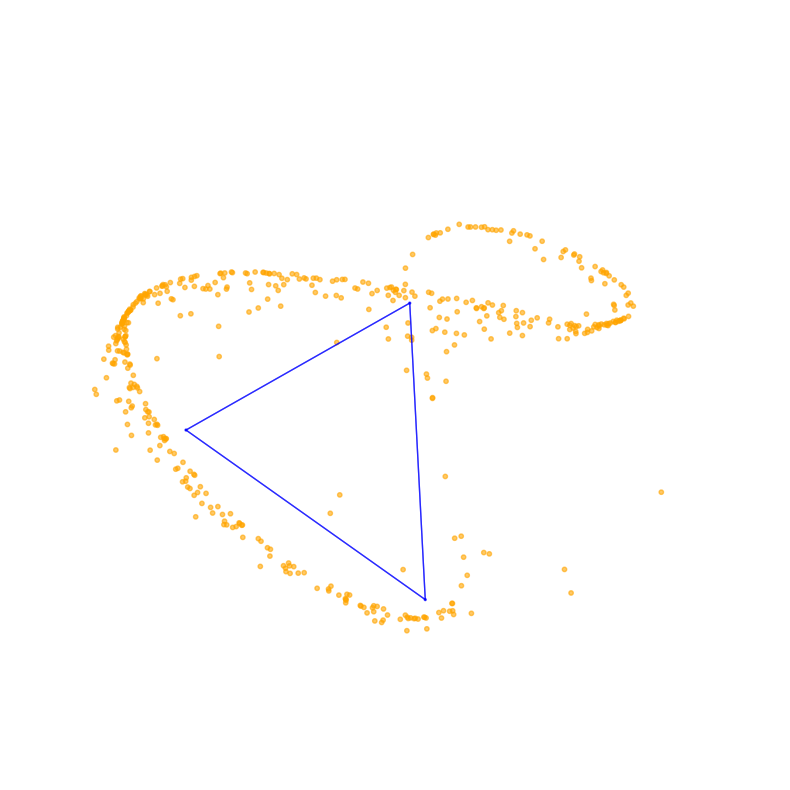

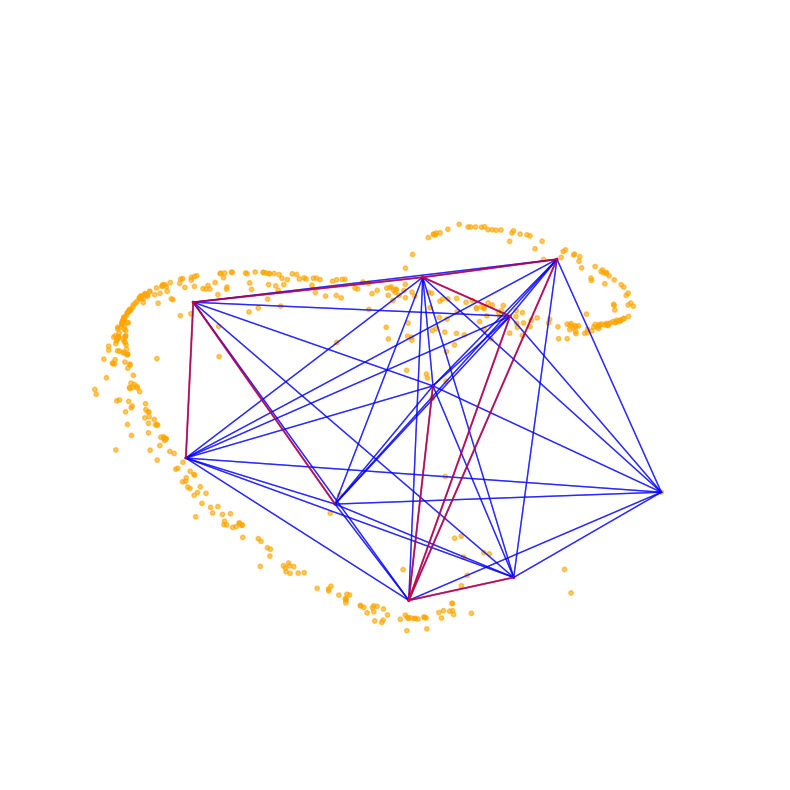

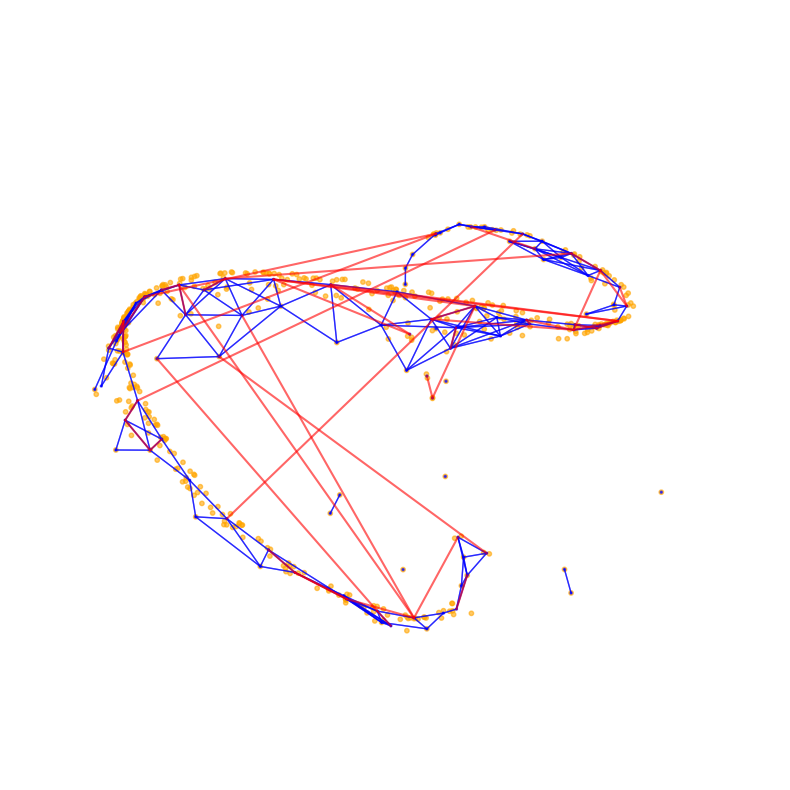

In [6]:
gw_data_for_viz = X_train_subset.T

# visualize
for i, net_info in enumerate(networks, 1):
    config = net_info['config']
    network = net_info['network']
    
    network.visualize_gravitational_waves(
        gw_data=gw_data_for_viz,
        azim=45,  # azimuth
        elev=30,  # elevation
        alpha=0.6  # transparency
    )